In [1]:
import os
import re
import pandas as pd
import numpy as np
from datetime import datetime as dt
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns


%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

In [2]:
path = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190921.txt'
col_names= ['CA','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME','DESC','ENTRIES','EXITS']
df = pd.read_csv(path, sep=",", header=0, names = col_names, parse_dates=[['DATE', 'TIME']])

In [3]:
df.columns = df.columns.str.strip()
df = df[df.DESC == 'REGULAR']

In [4]:
df['ENTRIES_diff'] = df.ENTRIES.diff()
df['EXITS_diff'] = df.EXITS.diff()

In [5]:
df. head(5)

DATE_TIME    CA  UNIT       SCP STATION LINENAME DIVISION  \
0 2019-09-14 00:00:00  A002  R051  02-00-00   59 ST  NQR456W      BMT   
1 2019-09-14 04:00:00  A002  R051  02-00-00   59 ST  NQR456W      BMT   
2 2019-09-14 08:00:00  A002  R051  02-00-00   59 ST  NQR456W      BMT   
3 2019-09-14 12:00:00  A002  R051  02-00-00   59 ST  NQR456W      BMT   
4 2019-09-14 16:00:00  A002  R051  02-00-00   59 ST  NQR456W      BMT   

      DESC  ENTRIES    EXITS  ENTRIES_diff  EXITS_diff  
0  REGULAR  7198818  2438323           NaN         NaN  
1  REGULAR  7198834  2438325          16.0         2.0  
2  REGULAR  7198847  2438354          13.0        29.0  
3  REGULAR  7198929  2438428          82.0        74.0  
4  REGULAR  7199125  2438483         196.0        55.0

In [6]:
df['ENTRIES_diff'] = df.groupby(['STATION','CA']).ENTRIES_diff.transform(
    lambda x: np.where((x<0)|(x>20000),x.mask((x<0)|(x>20000)).mean(),x))

df['EXITS_diff'] = df.groupby(['STATION','CA']).EXITS_diff.transform(
    lambda x: np.where((x<0)|(x>20000),x.mask((x<0)|(x>20000)).mean(),x))

df['SUM'] = df.ENTRIES_diff + df.EXITS_diff
 

In [7]:
df.head(5)

DATE_TIME    CA  UNIT       SCP STATION LINENAME DIVISION  \
0 2019-09-14 00:00:00  A002  R051  02-00-00   59 ST  NQR456W      BMT   
1 2019-09-14 04:00:00  A002  R051  02-00-00   59 ST  NQR456W      BMT   
2 2019-09-14 08:00:00  A002  R051  02-00-00   59 ST  NQR456W      BMT   
3 2019-09-14 12:00:00  A002  R051  02-00-00   59 ST  NQR456W      BMT   
4 2019-09-14 16:00:00  A002  R051  02-00-00   59 ST  NQR456W      BMT   

      DESC  ENTRIES    EXITS  ENTRIES_diff  EXITS_diff    SUM  
0  REGULAR  7198818  2438323           NaN         NaN    NaN  
1  REGULAR  7198834  2438325          16.0         2.0   18.0  
2  REGULAR  7198847  2438354          13.0        29.0   42.0  
3  REGULAR  7198929  2438428          82.0        74.0  156.0  
4  REGULAR  7199125  2438483         196.0        55.0  251.0

In [10]:
df[df.DATE_TIME =='09/14/2019'].groupby(
    ['STATION'],sort = False).nunique().CA.sort_values().tail(5)

STATION
59 ST              5
14 ST              6
TIMES SQ-42 ST     6
23 ST              7
34 ST-PENN STA    11
Name: CA, dtype: int64

In [85]:
best_5_stations = df[df['STATION'].isin(['GRD CNTRL-42 ST'])]#,'125 ST','CANAL ST', '23 ST','86 ST'])]

In [86]:
best_5_stations.head()

DATE_TIME    CA  UNIT       SCP          STATION LINENAME  \
157318 2019-09-14 01:00:00  R236  R045  00-00-00  GRD CNTRL-42 ST    4567S   
157319 2019-09-14 05:00:00  R236  R045  00-00-00  GRD CNTRL-42 ST    4567S   
157320 2019-09-14 08:50:01  R236  R045  00-00-00  GRD CNTRL-42 ST    4567S   
157321 2019-09-14 09:00:00  R236  R045  00-00-00  GRD CNTRL-42 ST    4567S   
157322 2019-09-14 13:00:00  R236  R045  00-00-00  GRD CNTRL-42 ST    4567S   

       DIVISION     DESC  ENTRIES    EXITS  ENTRIES_diff  EXITS_diff  \
157318      IRT  REGULAR  2172790  5852002     232.07906  217.683761   
157319      IRT  REGULAR  2172790  5852003       0.00000    1.000000   
157320      IRT  REGULAR  2172821  5852141      31.00000  138.000000   
157321      IRT  REGULAR  2172824  5852156       3.00000   15.000000   
157322      IRT  REGULAR  2172969  5852426     145.00000  270.000000   

               SUM day_of_week  
157318  449.762821    Saturday  
157319    1.000000    Saturday  
157320  169.000000    Saturday  
157321   18.000000    Saturday  
157322  415.000000    Saturday

In [87]:
best_5_stations.values

array([[Timestamp('2019-09-14 01:00:00'), 'R236', 'R045', ...,
        217.68376068376068, 449.7628205128205, 'Saturday'],
       [Timestamp('2019-09-14 05:00:00'), 'R236', 'R045', ..., 1.0, 1.0,
        'Saturday'],
       [Timestamp('2019-09-14 08:50:01'), 'R236', 'R045', ..., 138.0,
        169.0, 'Saturday'],
       ...,
       [Timestamp('2019-09-20 13:00:00'), 'R241A', 'R048', ..., 10.0,
        91.0, 'Friday'],
       [Timestamp('2019-09-20 17:00:00'), 'R241A', 'R048', ..., 10.0,
        300.0, 'Friday'],
       [Timestamp('2019-09-20 21:00:00'), 'R241A', 'R048', ..., 5.0,
        551.0, 'Friday']], dtype=object)

In [14]:
# df['HOUR'] = df['DATE_TIME'].map(int(time.split(':')[0]))
# df['MONTH'] = df['DATE_TIME'].map(int(date.split('-')[0]))
# df['YEAR'] = df['DATE_TIME'].map(2000 + int(date.split('-')[2]))

In [20]:
df['day_of_week'] = df['DATE_TIME'].dt.weekday_name

In [21]:
df.head()

DATE_TIME    CA  UNIT       SCP STATION LINENAME DIVISION  \
0 2019-09-14 00:00:00  A002  R051  02-00-00   59 ST  NQR456W      BMT   
1 2019-09-14 04:00:00  A002  R051  02-00-00   59 ST  NQR456W      BMT   
2 2019-09-14 08:00:00  A002  R051  02-00-00   59 ST  NQR456W      BMT   
3 2019-09-14 12:00:00  A002  R051  02-00-00   59 ST  NQR456W      BMT   
4 2019-09-14 16:00:00  A002  R051  02-00-00   59 ST  NQR456W      BMT   

      DESC  ENTRIES    EXITS  ENTRIES_diff  EXITS_diff    SUM day_of_week  
0  REGULAR  7198818  2438323           NaN         NaN    NaN    Saturday  
1  REGULAR  7198834  2438325          16.0         2.0   18.0    Saturday  
2  REGULAR  7198847  2438354          13.0        29.0   42.0    Saturday  
3  REGULAR  7198929  2438428          82.0        74.0  156.0    Saturday  
4  REGULAR  7199125  2438483         196.0        55.0  251.0    Saturday

In [ ]:
sns.barplot(x ='day_of_week',y = 'SUM',data=best_5_stations)

In [ ]:
for station in best_5_stations.STATION.unique():
    sns.barplot(x = 'day_of_week',y = 'SUM',data=best_5_stations[best_5_stations.STATION==station])

## GET THE C/A ASSOCIATED WITH EACH STATION

In [23]:
best_5_stations.groupby('STATION')['CA'].apply(lambda x: list(np.unique(x)))

STATION
125 ST                          [N025, N026, R174, R258, R304, R305]
23 ST              [A030, A031, N075, N076, N077, N508, N509, R13...
86 ST              [C025, C026, D016, N043, R164, R165, R166, R24...
CANAL ST                  [A043, A046, A066, N089, N090, R119, R120]
GRD CNTRL-42 ST        [R236, R237, R237B, R238, R238A, R240, R241A]
Name: CA, dtype: object

In [29]:
def get_ca(station):
    return list(df.loc[df['STATION'] == station, 'CA'].unique())

In [33]:
ca_in_59st = get_ca('59 ST')

In [34]:
ca_in_59st

['A002', 'R244', 'R244A', 'R245', 'R245A']

In [92]:
filter_by_station_59st = df[(df['STATION'] == '59 ST') & (df['day_of_week'] == 'Saturday')]
# & (df['CA'].isin(['A002', 'R244', 'R244A', 'R245', 'R245A']))]

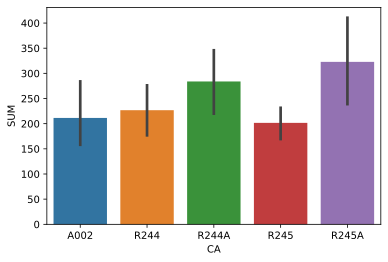

In [94]:
sns.barplot(x = 'CA',y='SUM',data=filter_by_station_59st)

In [88]:
sns.pairplot(